In [4]:
import os
import pandas as pd
from scipy.stats import linregress
import scipy as sts
import scipy.stats as st
import seaborn as sns
import numpy as np
import pylab as pl
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.ticker import FuncFormatter
import datetime as datetime
import gmaps
import requests
import json
%matplotlib notebook

In [5]:
world_df= pd.read_csv("../Resources/owid-covid-data.csv")


updated_world_df=world_df.drop(["iso_code","new_deaths_per_million","total_tests","new_tests",
                                "new_tests_smoothed_per_thousand","population","median_age","aged_70_older",
                                "extreme_poverty","diabetes_prevalence","female_smokers","male_smokers",
                               "handwashing_facilities","hospital_beds_per_thousand","life_expectancy",
                               "new_tests_smoothed","new_tests_per_thousand","tests_units","total_deaths",
                               "new_deaths","total_cases_per_million","new_cases_per_million"], axis=1)

updated_world_df=updated_world_dfupdated_world_df=updated_world_df.rename(columns={"location":"Country", "continent":"Continent","date":"Date",
                                                                                   "total_cases":"Total Cases", "new_cases":"New Cases",
                                                                                   "total_cases_per_million": "Total Cases Per Million",
                                                                                   "total_deaths_per_million":"Total Deaths Per Million",
                                                                                   "total_tests_per_thousand":"Total Test Per Thousands",
                                                                                   "population_density":"Population Density","aged_65_older":"Aged 65 or older",
                                                                                   "gdp_per_capita":"GDP Per Capita","cvd_death_rate":"Covid Death Rate",
                                                                                   "stringency_index":"Stringency Index"})

updated_world_df.head()

,Continent,Country,Date,Total Cases,New Cases,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,NaN,NaN,54.422,2.581,1803.987,597.029
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029


In [6]:
#Number Hospital Beds is based on the lastest year per Country

data = pd.read_csv("../Resources/data.csv")

who_df = data.iloc[data.groupby("Country")["Year"].agg(pd.Series.idxmax)]
who_df.reset_index(drop=True).set_index("Country")
who_df=who_df.rename(columns={"Hospital beds (per 10 000 population)":"Hospital Beds (per 10K people)"})
hospital_beds_df=who_df.drop(["Year"], axis=1)

hospital_beds_df.head()

,Country,Hospital Beds (per 10K people)
0,Afghanistan,5
16,Albania,29
29,Algeria,19
31,Angola,8
32,Antigua and Barbuda,38


In [7]:
#Smoking Percentage is based on the lastest year per Country

smokingdata = pd.read_csv("../Resources/smokingdata.csv")

smokingdata_df = smokingdata.iloc[smokingdata.groupby("Country")["Year"].agg(pd.Series.idxmax)]

clean_smoking_data = smokingdata_df.drop(["Estimate of current cigarette smoking prevalence (%).1", "Estimate of current cigarette smoking prevalence (%).2", 
                                       "Estimate of current tobacco smoking prevalence (%)", "Estimate of current tobacco smoking prevalence (%).1", 
                                       "Estimate of current tobacco smoking prevalence (%).2", "Estimate of current tobacco use prevalence (%)", 
                                       "Estimate of current tobacco use prevalence (%).1", "Estimate of current tobacco use prevalence (%).2"], axis=1)

 
clean_smoking_data=clean_smoking_data.rename(columns={"Estimate of current cigarette smoking prevalence (%)":"Smoking Prevalence (%)"})
smoking_data = clean_smoking_data
smoking_prevalence=list(smoking_data["Smoking Prevalence (%)"])
smoking_percentage=[]

for x in smoking_prevalence:
    y=x.split("[")
    smoking_percentage.append(y[0])
    

    
column_values = pd.Series(smoking_percentage)
smoking_data.insert(loc=2, column="Smoking Percetage", value=column_values)
smoking_year_df=smoking_data.drop(["Smoking Prevalence (%)"], axis=1)

smoking_df=smoking_year_df.drop(["Year"], axis=1)

smoking_df.head()

,Country,Smoking Percetage
1,Albania,11.20
7,Algeria,15.20
13,Andorra,21.40
19,Argentina,31.40
25,Armenia,6.00


In [8]:
world_df=pd.read_csv("../Resources/dsh_simple.csv")

world_df=world_df[["Countryname","IfclosedduetoCOVID19whend","Statusof Schoolsaresomeall (copy) (group)",
          "Latitude (generated)","Longitude (generated)","Incomelevelname"]]

income_level_df=world_df.rename(columns={"Countryname":"Country", "Latitude (generated)":"Latitude", 
                      "Longitude (generated)": "Longitude", "Incomelevelname": "Income Level",
                        "Statusof Schoolsaresomeall (copy) (group)":"School Status"})
income_df=income_level_df.drop(["IfclosedduetoCOVID19whend"], axis =1)

income_df.head()

,Country,School Status,Latitude,Longitude,Income Level
0,Eritrea,Closed,15.9820,38.0200,Low income
1,Guinea-Bissau,Closed,12.1910,-14.4750,Low income
2,San Marino,Closed,43.9420,12.4611,High income
3,Georgia,Closed,42.0500,43.5760,Upper middle income
4,Italy,Closed,44.3713,11.1084,High income


In [9]:
combined_df=pd.merge(updated_world_df,hospital_beds_df,on="Country",how="left").merge(smoking_df,on="Country",how="left" ).merge(income_df,on="Country",how="left")

combined_df.head()

,Continent,Country,Date,Total Cases,New Cases,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,NaN,NaN,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income


<IPython.core.display.Javascript object>


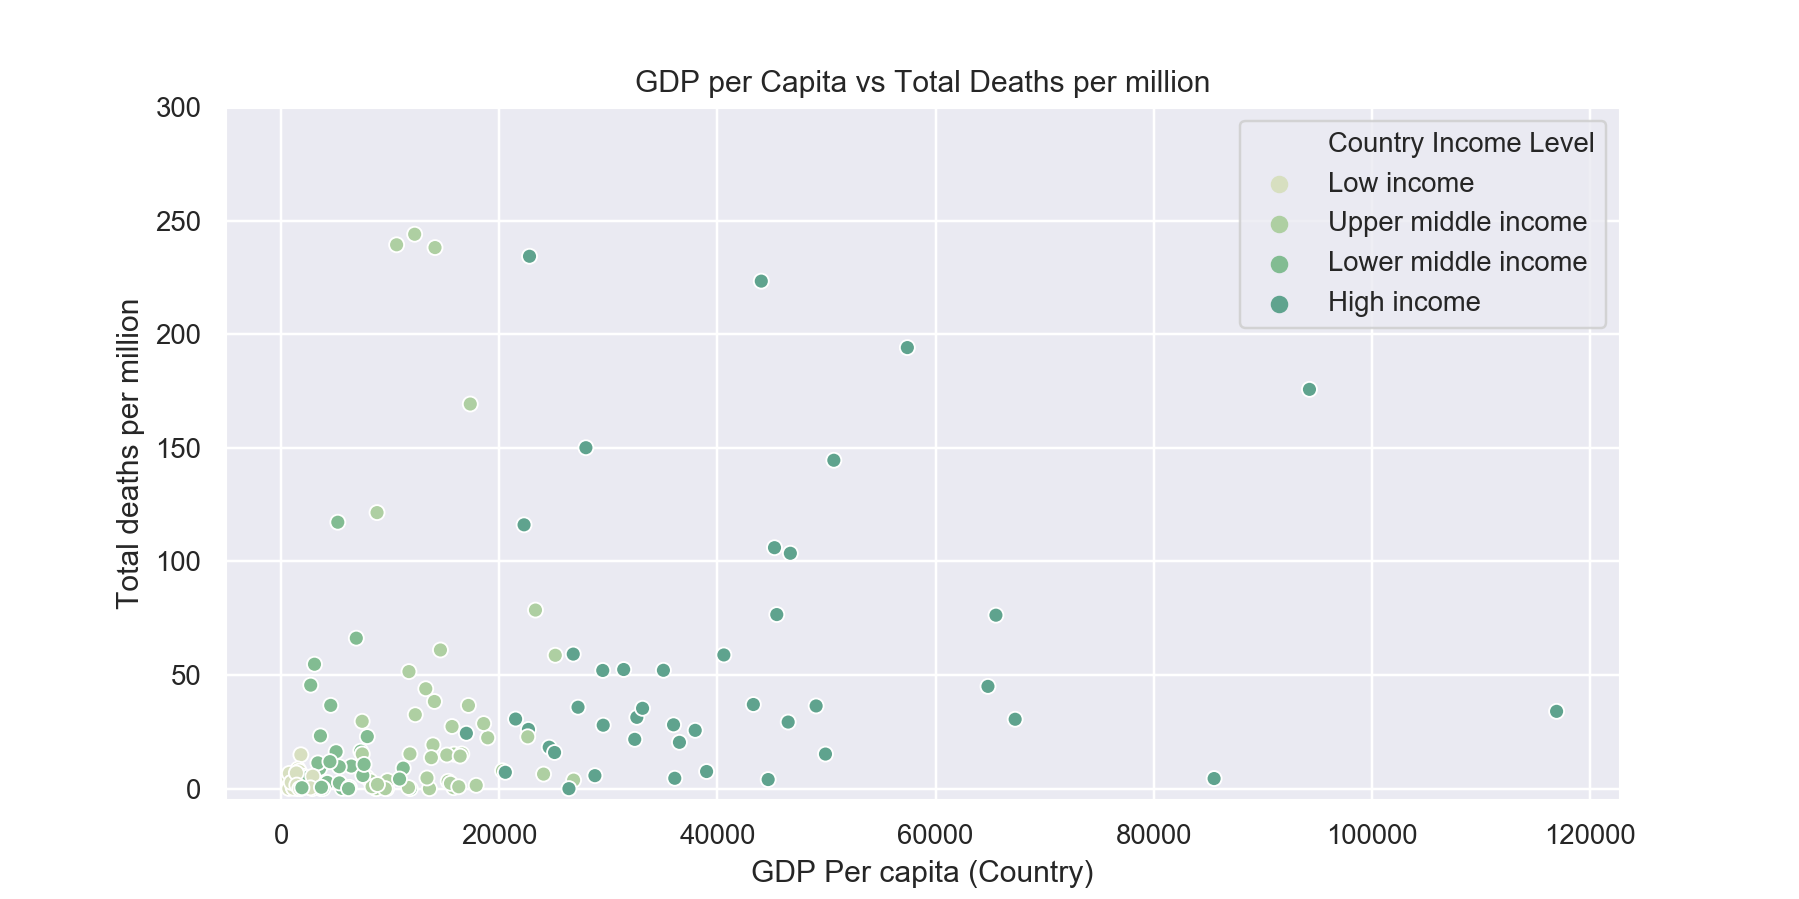

In [70]:
#get unique country names & get max total deaths per million/gpd/pop. density for each country
#cleaning data
max_deaths_country=  combined_df.groupby(["Country"]).agg({"Total Deaths Per Million": "max","Income Level":"unique", "Continent": "unique"})
max_pop_country=  combined_df.groupby(["Country"]).agg({"Population Density": "max"})
max_gdp_country=  combined_df.groupby(["Country"]).agg({"GDP Per Capita": "max" })
income=[]
continent=[]
max_combined_country = pd.merge(max_deaths_country,max_gdp_country, how= "outer", on = 'Country')
max_combined_country = pd.merge(max_combined_country,max_pop_country, how = 'outer', on = 'Country')
for index, row in max_combined_country.iterrows():
    x=row["Income Level"][0]
    y=row ["Continent"][0]
    income.append(x)
    continent.append(y)
max_combined_country["Country Income Level"]=income
max_combined_country["Continent"]=continent
max_combined_country_clean=max_combined_country.dropna(how = 'any')
max_combined_country_clean=max_combined_country_clean.reset_index()
max_combined_country_clean.head(20) 

sns.set()
with sns.cubehelix_palette(8, start=.5, rot=-.75,reverse=False):
    plt.figure(figsize=(10,5))
    sns.scatterplot(data= max_combined_country_clean, x="GDP Per Capita",y="Total Deaths Per Million",hue= "Country Income Level",alpha =1)
    plt.title("GDP per Capita vs Total Deaths per million")
    plt.xlabel("GDP Per capita (Country)")
    plt.ylabel("Total deaths per million")
    plt.ylim(-5,300)

In [69]:
sns.set()
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

with sns.color_palette(flatui):
    sns.scatterplot(max_combined_country_clean["Population Density"],max_combined_country_clean["Total Deaths Per Million"], 
                    hue=max_combined_country_clean["Country Income Level"],alpha = 1, 
                    #hue_order=["Low Income", "Lower middle income","Upper middle income","High income"] 
                   )
    plt.ylim(-50, 850)
    plt.xlim(-50,2000)
    plt.title("Population Density vs. Total deaths per million")
    plt.xlabel("Population Density")
    plt.ylabel("Deaths per million")
    plt.show()
#How does population density affect Deaths per million? are lower income countries more susceptible?
fig = px.scatter(max_combined_country_clean,x='Population Density',y='Total Deaths Per Million'
                 ,facet_col= 'Country Income Level'
                , hover_name= "Country",color= "Continent", width = 1500)
fig.update_layout(title="Population Density vs. Total deaths per million", )
fig.update_yaxes(range=[-2, 700])
fig.update_xaxes(range=[-50, 2000])
fig.show()



In [40]:
#Does GDP affect the spread of Covid-19?
print(Correlationm)
fig2 = px.scatter(max_combined_country_clean,x='GDP Per Capita',y='Total Deaths Per Million'
                , hover_name= "Country", width = 1500, trendline= "ols")
fig2.update_layout(title="GDP Per Capita vs. Total deaths per million", )
fig2.update_xaxes(range=[-50, 120000])




Correlation: 0.021


In [60]:
df = max_combined_country_clean
fig = px.box(df, x="Continent", y="Total Deaths Per Million", hover_name= "Country"
             , color= "Continent"
            )
fig.show()
quartilesm = max_combined_country_clean['Total Deaths Per Million'].quantile([.25,.5,.75])
lowerqm = quartilesm[0.25]
upperqm = quartilesm[0.75]
iqrm = upperqm-lowerqm

lower_boundm = lowerqm - (1.5*iqrm)
upper_boundm = upperqm + (1.5*iqrm)

quartilestm1 = max_combined_country_clean['Population Density'].quantile([.25,.5,.75])
lowerqm1 = quartilestm1[0.25]
upperqm1 = quartilestm1[0.75]
iqrm1 = upperqm1-lowerqm1

lower_boundmm1 = lowerqm1 - (1.5*iqrm1)
upper_boundmm1 = upperqm1 + (1.5*iqrm1)